# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline
sns.set_style("whitegrid")

# Load Data

In [2]:
normal_df = pd.read_csv('ptbdb_normal.csv', header=None)
abnormal_df = pd.read_csv('ptbdb_abnormal.csv', header=None)

print(f"Số mẫu Normal: {normal_df.shape}")
print(f"Số mẫu Abnormal: {abnormal_df.shape}")

display(normal_df.head())

Số mẫu Normal: (4046, 188)
Số mẫu Abnormal: (10506, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Preprocessing

In [3]:
df = pd.concat([normal_df, abnormal_df], axis=0)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(f"Kích thước tập Feature (X): {X.shape}")
print(f"Kích thước tập Label (y): {y.shape}")

Kích thước tập Feature (X): (14552, 187)
Kích thước tập Label (y): (14552,)


# Split Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Số lượng mẫu Train: {X_train.shape[0]}")
print(f"Số lượng mẫu Test: {X_test.shape[0]}")

Số lượng mẫu Train: 11641
Số lượng mẫu Test: 2911


# Train Model

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

print("Đang huấn luyện mô hình...")
model.fit(X_train, y_train)
print("Huấn luyện hoàn tất!")

Đang huấn luyện mô hình...
Huấn luyện hoàn tất!


# Evaluate Model

In [6]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác (Accuracy): {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Độ chính xác (Accuracy): 0.9705

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95       809
         1.0       0.97      0.99      0.98      2102

    accuracy                           0.97      2911
   macro avg       0.97      0.96      0.96      2911
weighted avg       0.97      0.97      0.97      2911



# Confusion Matrix

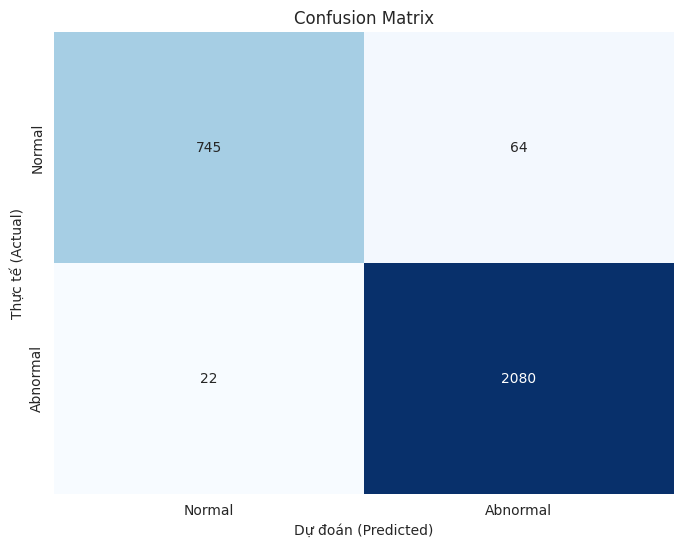

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Abnormal'],
            yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Dự đoán (Predicted)')
plt.ylabel('Thực tế (Actual)')
plt.title('Confusion Matrix')
plt.show()

# Test

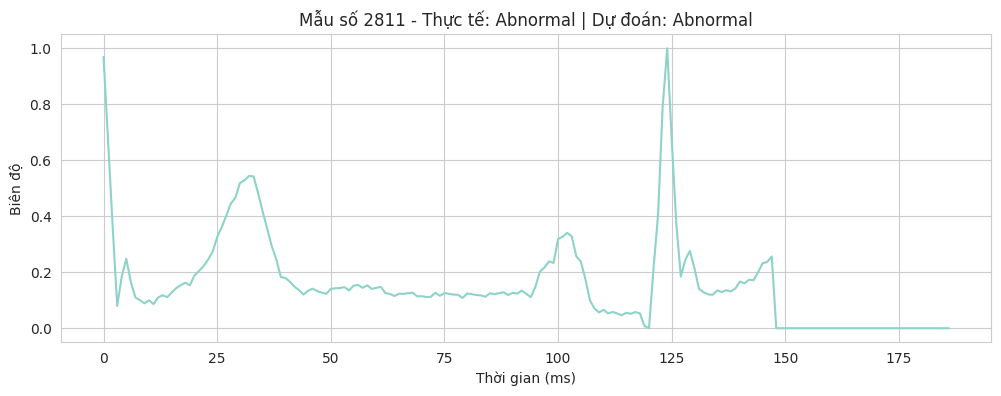

In [8]:
idx = np.random.randint(0, len(X_test))
sample_signal = X_test[idx]
true_label = y_test[idx]

prediction = model.predict([sample_signal])[0]
label_map = {0: 'Normal', 1: 'Abnormal'}

plt.figure(figsize=(12, 4))
plt.plot(sample_signal)
plt.title(f"Mẫu số {idx} - Thực tế: {label_map[true_label]} | Dự đoán: {label_map[prediction]}")
plt.xlabel("Thời gian (ms)")
plt.ylabel("Biên độ")
plt.grid(True)
plt.show()